##Imports

In [1]:
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy as sp
import numpy as np


def MSEloss(true_value , prediction_value):
    true_value = np.array(true_value)
    prediction_value = np.array(prediction_value)

    MSE =  sum( (true_value - prediction_value)**2 ) / len(true_value)

    return MSE


def BIC(mse , n_samples, j_features):
    n = n_samples
    j = j_features
    bic = n * (np.log(mse)) + j* ( np.log(n) )
    return bic

def AIC(mse , n_samples, j_features):
    n = n_samples
    j = j_features
    aic = n * (np.log(mse)) + 2*j
    return aic

#Data: Internet Firewall Dataset

In [ ]:
missing_values = ["n/a", "na", "--", " ", "", "Null", "-", "NaN", "N/A" ]
data = pd.read_csv( "/content/log2.csv" , na_values=missing_values)

print(targets.value_counts())

label_encoder = preprocessing.LabelEncoder()
data["Action"] = label_encoder.fit_transform(data["Action"])

classes = label_encoder.classes_
print("classes:\n", classes)
encoded_classes = label_encoder.transform(classes)
print("", encoded_classes, "\n\n")

# print(data.info())

features = data.drop(columns=["Action"])
attributes = features.columns.to_list()
num_of_features = len(attributes)

targets = data["Action"]
print( features.info() )

# print(targets.tail())

classes:
 ['allow' 'deny' 'drop' 'reset-both']
 [0 1 2 3] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Source Port           65532 non-null  int64
 1   Destination Port      65532 non-null  int64
 2   NAT Source Port       65532 non-null  int64
 3   NAT Destination Port  65532 non-null  int64
 4   Bytes                 65532 non-null  int64
 5   Bytes Sent            65532 non-null  int64
 6   Bytes Received        65532 non-null  int64
 7   Packets               65532 non-null  int64
 8   Elapsed Time (sec)    65532 non-null  int64
 9   pkts_sent             65532 non-null  int64
 10  pkts_received         65532 non-null  int64
dtypes: int64(11)
memory usage: 5.5 MB
None


Source Port             2.327368e+08
Destination Port        3.409942e+08
NAT Source Port         4.827112e+08
NAT Destination Port    9.485128e+07
Bytes                   3.156686e+13
Bytes Sent              1.465465e+13
Bytes Received          6.067392e+12
Packets                 2.634771e+07
Elapsed Time (sec)      9.148312e+04
pkts_sent               1.036113e+07
pkts_received           4.943206e+06
dtype: float64


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


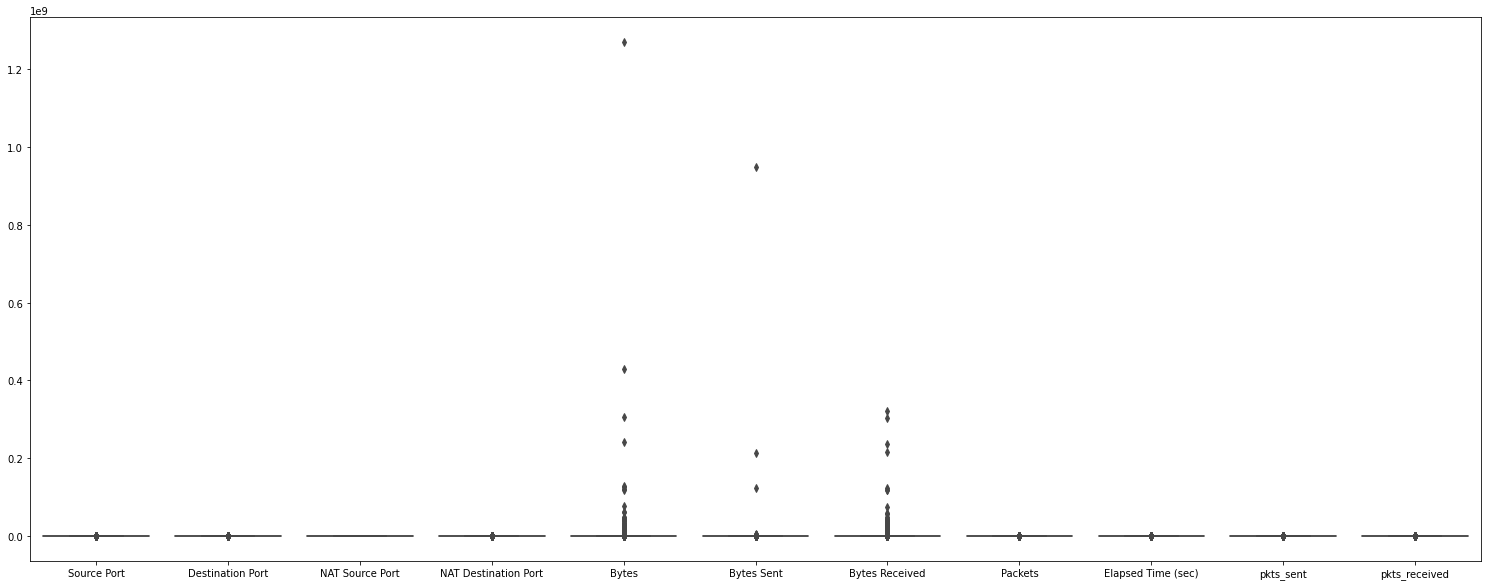

In [ ]:
plt.figure(figsize=( 26,10 ) )
print(features.var(axis=0))
sb.boxplot(data = features)
# # plt.figure( figsize=(20,24) )
# for i in range( 0 , len(attributes) ):
#     plt.subplot(1 , len(attributes) , i+1)
#     sb.boxplot(data= features[attributes[i]] )
#     plt.xlabel( attributes[i])

features.describe()

Source Port             0.054192
Destination Port        0.079396
NAT Source Port         0.112393
NAT Destination Port    0.022085
Bytes                   0.000020
Bytes Sent              0.000016
Bytes Received          0.000059
Packets                 0.000025
Elapsed Time (sec)      0.000781
pkts_sent               0.000019
pkts_received           0.000046
dtype: float64


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,0.753685,0.161401,0.294239,0.040758,7.646690e-05,2.353857e-05,2.329149e-04,9.831538e-05,0.006082,0.000054,0.000188
std,0.232791,0.281774,0.335251,0.148610,4.426202e-03,4.036089e-03,7.676371e-03,4.954086e-03,0.027944,0.004306,0.006795
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.750496,0.001221,0.000000,0.000000,4.726795e-09,6.325930e-09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,0.820589,0.006790,0.134592,0.000809,8.508232e-08,3.162965e-08,2.461966e-07,9.651438e-07,0.001386,0.000000,0.000003
75%,0.894772,0.228885,0.585431,0.006760,5.453540e-07,1.581482e-07,1.399269e-06,4.825719e-06,0.002772,0.000003,0.000006
max,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000


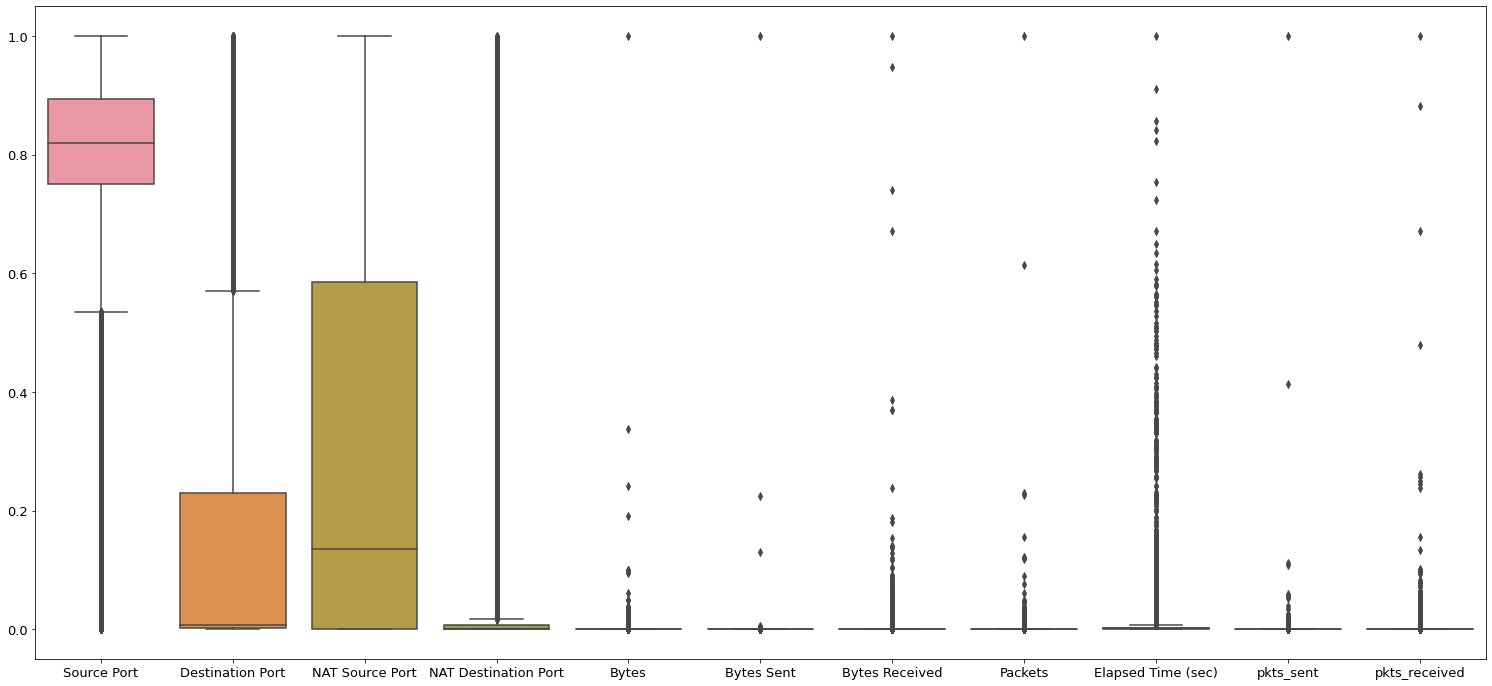

In [ ]:
std_scaler = preprocessing.MinMaxScaler()
scaled_features = pd.DataFrame( std_scaler.fit_transform(features), columns=features.columns )

print(scaled_features.var(axis=0))

plt.figure(figsize=( 26,12 ) )
boxplot = sb.boxplot(data = scaled_features)
boxplot.tick_params(labelsize = 13)

scaled_features.describe()

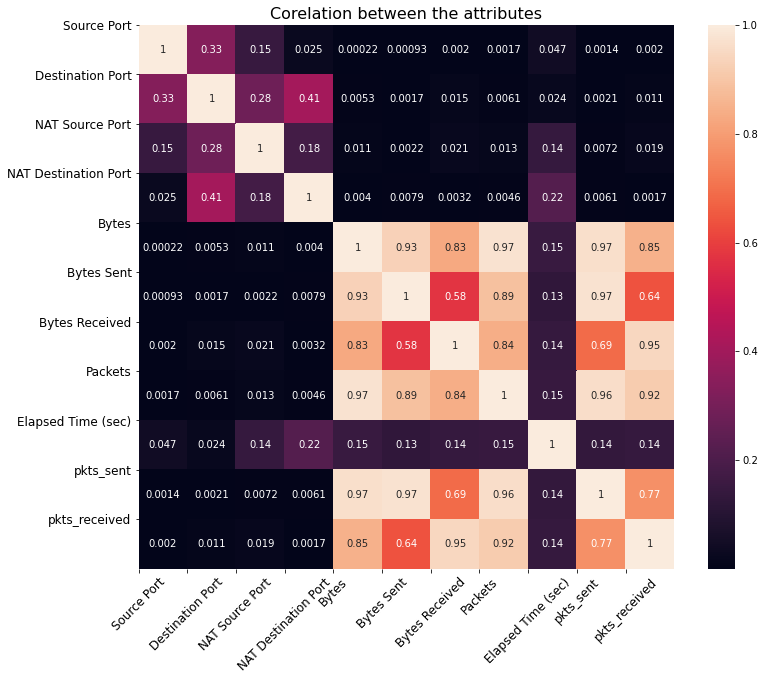

In [ ]:
plt.figure(figsize=(12, 10))

plt.title( "Corelation between the attributes" ,  fontsize=16)
# cb = plt.colorbar()

corrMatrix = scaled_features.corr().abs()
sb.heatmap(corrMatrix, annot=True)
plt.xticks( range(len(attributes)), labels=scaled_features.columns , fontsize=12, rotation=45)
plt.yticks( range(len(attributes)), labels=scaled_features.columns ,fontsize=12)
plt.show()

(65532, 11)
(65532,)


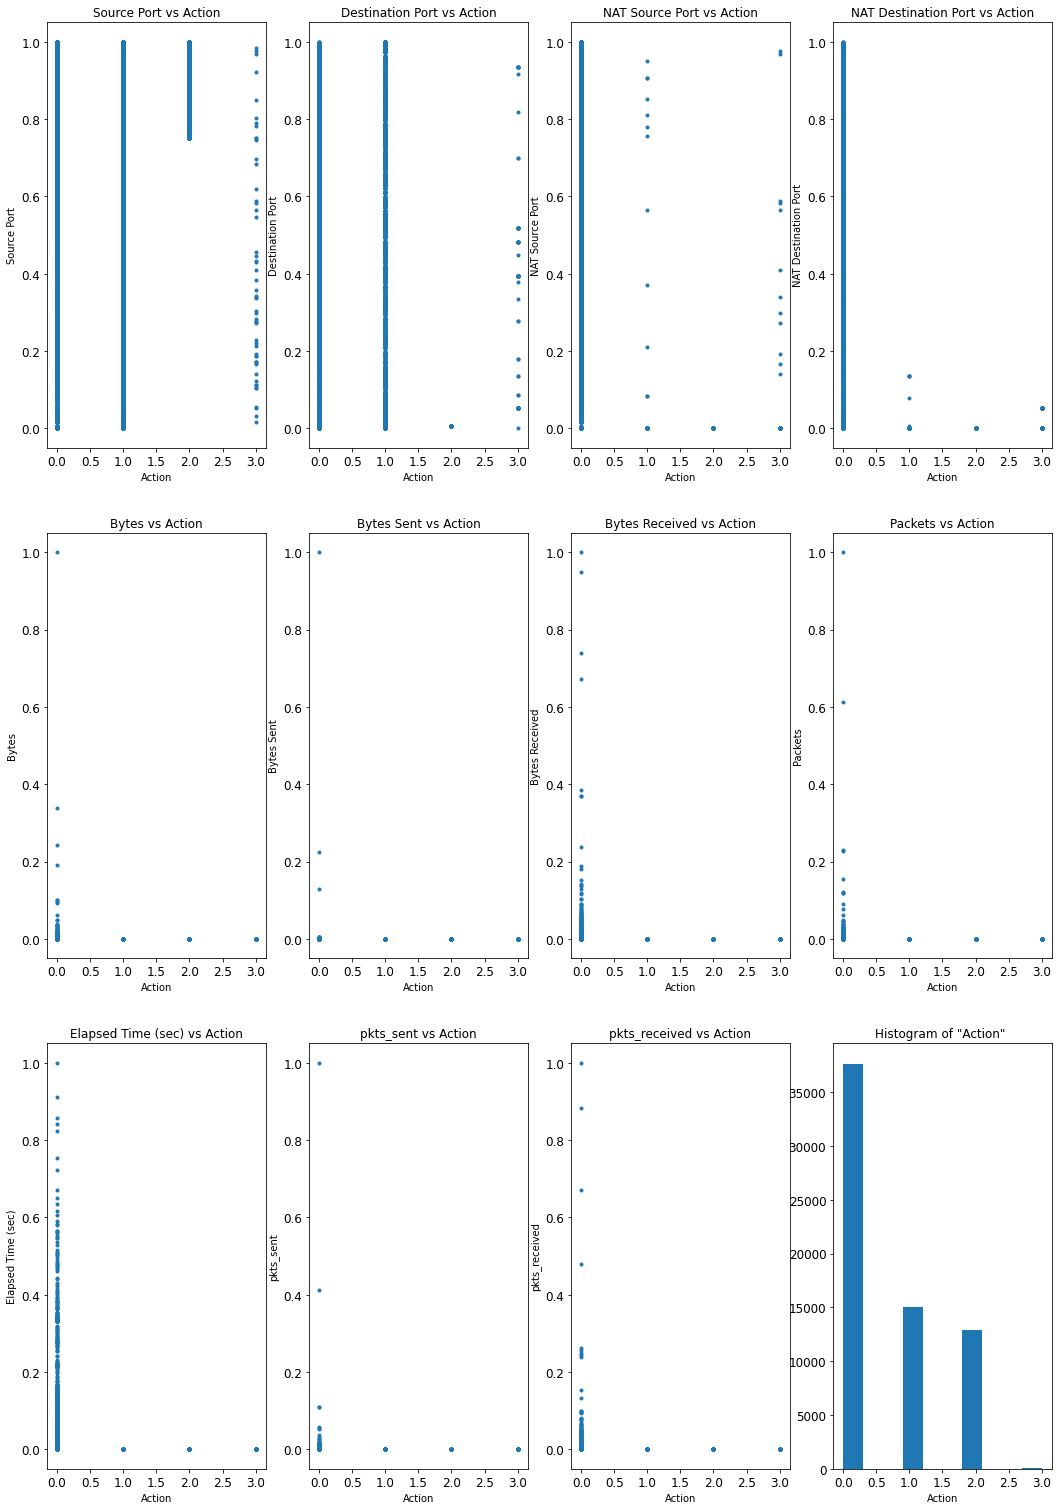

0    37640
1    14987
2    12851
3       54
Name: Action, dtype: int64


In [ ]:
print(features.shape)
print(targets.shape)

plt.figure( figsize=(18,36) )

for i in range( 0 , len(attributes) ):
    plt.subplot(4 , 4, i+1)
    plt.scatter(  x= targets, y=scaled_features[ scaled_features.columns[i]], marker="." )
    plt.xlabel("Action")
    plt.ylabel(attributes[i])
    plt.xticks( fontsize=12)
    plt.yticks( fontsize=12)
    plt.title ( attributes[i] +" vs Action")

plt.subplot(4 , 4, i+2)
plt.hist( targets )
plt.xlabel("Action")
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.title ( "Histogram of \"Action\" " )
plt.show()

In [ ]:
p_values = dict()
for i in range (0, len(attributes)):
    pear_coef, p_value = sp.stats.pearsonr( scaled_features[scaled_features.columns[i]] , targets)
    p_values[attributes[i]] = p_value

p_values = sorted( p_values.items() , key = lambda element: element[1] )
print("P_value of attribute:")
for item in p_values:
    print(item)

P_value of attribute:
('NAT Source Port', 0.0)
('NAT Destination Port', 0.0)
('Elapsed Time (sec)', 0.0)
('Destination Port', 1.6197834085982896e-131)
('Source Port', 9.340751162666327e-23)
('Bytes Received', 1.1171072052740734e-09)
('pkts_received', 2.8524444823291623e-08)
('Packets', 6.78023487925088e-05)
('Bytes', 0.0005250325883176515)
('pkts_sent', 0.011756349871672754)
('Bytes Sent', 0.24200540325897638)


#Split the data

In [ ]:
print(type(scaled_features))
print(type(targets))

X = scaled_features.to_numpy()
y = targets.to_frame().to_numpy()

print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=13 )

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(type(x_train))
print(type(y_train))
print(x_test.shape)
print(y_test.shape)

models = ["KNN", "DT", "NB", "SGD"]
score_metrics = ["acc", "balance_acc", "precision", "recall", "f1", "MSE", "AIC", "BIC"]

models_scores = dict()

for item in models:
    models_scores[item]={"acc":0.0, "balance_acc":0.0, "precision":0.0, "recall":0.0, "f1":0.0,  "MSE":0.0, "AIC":0.0, "BIC":0.0}
    print(item ,": ", models_scores[item])

(45872, 11)
(45872, 1)
(19660, 11)
(19660, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(19660, 11)
(19660, 1)
KNN :  {'acc': 0.0, 'balance_acc': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'MSE': 0.0, 'AIC': 0.0, 'BIC': 0.0}
DT :  {'acc': 0.0, 'balance_acc': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'MSE': 0.0, 'AIC': 0.0, 'BIC': 0.0}
NB :  {'acc': 0.0, 'balance_acc': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'MSE': 0.0, 'AIC': 0.0, 'BIC': 0.0}
SGD :  {'acc': 0.0, 'balance_acc': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'MSE': 0.0, 'AIC': 0.0, 'BIC': 0.0}


#Classfications

##KNN classifier

n_neighbors 5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11306
           1       0.99      0.99      0.99      4556
           2       1.00      1.00      1.00      3783
           3       0.00      0.00      0.00        15

    accuracy                           0.99     19660
   macro avg       0.74      0.75      0.75     19660
weighted avg       0.99      0.99      0.99     19660

acc : 0.994354018311292
balance_acc : 0.7465340510846253
precision : 0.994354018311292
recall : 0.994354018311292
f1 : 0.994354018311292
MSE : [2.53280773 0.77054934 0.77054934 ... 1.00829095 0.77054934 2.53280773]
AIC : [18292.59757599 -5102.41028973 -5102.41028973 ...   184.32799968
 -5102.41028973 18292.59757599]
BIC : [18379.34733132 -5015.6605344  -5015.6605344  ...   271.07775502
 -5015.6605344  18379.34733132]

confusion matrix:
 [[11251    55     0     0]
 [   26  4515    15     0]
 [    0     0  3783     0]
 [    2    13     0     0]] 




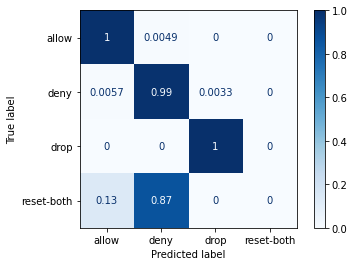

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


model_name='KNN'
n_neighbors = 5
model = KNeighborsClassifier(n_neighbors=n_neighbors)
print("n_neighbors", n_neighbors)
model.fit(x_train, y_train)

prediction = model.predict( x_test )

mseloss = MSEloss(y_test, prediction)


models_scores[model_name] = {"acc":model.score(x_test, y_test),
                        "balance_acc": metrics.balanced_accuracy_score( y_test, prediction), 
                        "precision":metrics.precision_score(  y_test, prediction , average='micro' ), 
                        "recall":metrics.recall_score(  y_test, prediction , average='micro' ), 
                        "f1":metrics.f1_score(  y_test, prediction , average='micro' ),
                        "MSE":mseloss,
                        "AIC":AIC(mseloss, y_test.shape[0], num_of_features ),
                        "BIC":BIC(mseloss, y_test.shape[0], num_of_features )
                        }

print(metrics.classification_report(y_test, prediction))

for item in models_scores[model_name]:
    print(item,":",models_scores[model_name][item])

print("\nconfusion matrix:\n", metrics.confusion_matrix( y_test, prediction ), "\n\n")
metrics.plot_confusion_matrix(model, x_test , y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

##Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11306
           1       0.99      0.99      0.99      4556
           2       1.00      1.00      1.00      3783
           3       0.30      0.20      0.24        15

    accuracy                           1.00     19660
   macro avg       0.82      0.80      0.81     19660
weighted avg       1.00      1.00      1.00     19660

acc : 0.9973041709053917
balance_acc : 0.7976699790860953
precision : 0.9973041709053917
recall : 0.9973041709053917
f1 : 0.9973041709053917
MSE : [2.53280773 0.77054934 0.77054934 ... 1.00829095 1.00829095 2.53280773]
AIC : [18292.59757599 -5102.41028973 -5102.41028973 ...   184.32799968
   184.32799968 18292.59757599]
BIC : [18379.34733132 -5015.6605344  -5015.6605344  ...   271.07775502
   271.07775502 18379.34733132]

confusion matrix:
 [[11304     1     0     1]
 [    9  4530    11     6]
 [    0    13  3770     0]
 [    0    12     0     3]] 




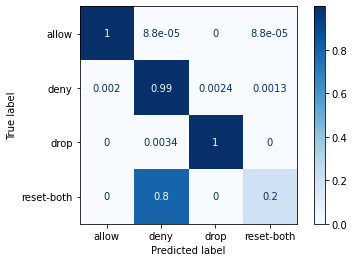

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_name='DT'
model = DecisionTreeClassifier(random_state = 0, min_samples_split=3)
model.fit(x_train, y_train)

prediction = model.predict( x_test )
mseloss = MSEloss(y_test, prediction)

models_scores[model_name] = {"acc":model.score(x_test, y_test),
                        "balance_acc": metrics.balanced_accuracy_score( y_test, prediction), 
                        "precision":metrics.precision_score(  y_test, prediction , average='micro' ), 
                        "recall":metrics.recall_score(  y_test, prediction , average='micro' ), 
                        "f1":metrics.f1_score(  y_test, prediction , average='micro' ),
                        "MSE":mseloss,
                        "AIC":AIC(mseloss, y_test.shape[0], num_of_features ),
                        "BIC":BIC(mseloss, y_test.shape[0], num_of_features )
                        }

print(metrics.classification_report(y_test, prediction))

for item in models_scores[model_name]:
    print(item,":",models_scores[model_name][item])

print("\nconfusion matrix:\n", metrics.confusion_matrix( y_test, prediction ), "\n\n")
metrics.plot_confusion_matrix(model, x_test , y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

##Naive Bays

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11306
           1       0.99      1.00      0.99      4556
           2       1.00      1.00      1.00      3783
           3       0.02      0.13      0.03        15

    accuracy                           0.99     19660
   macro avg       0.75      0.78      0.75     19660
weighted avg       1.00      0.99      0.99     19660

acc : 0.9916073245167853
balance_acc : 0.779317075251623
precision : 0.9916073245167853
recall : 0.9916073245167853
f1 : 0.9916073245167853
MSE : [2.53280773 0.77054934 0.77054934 ... 1.00829095 1.00829095 2.53280773]
AIC : [18292.59757599 -5102.41028973 -5102.41028973 ...   184.32799968
   184.32799968 18292.59757599]
BIC : [18379.34733132 -5015.6605344  -5015.6605344  ...   271.07775502
   271.07775502 18379.34733132]

confusion matrix:
 [[11174    36     0    96]
 [    0  4536    15     5]
 [    0     0  3783     0]
 [    0    13     0     2]] 




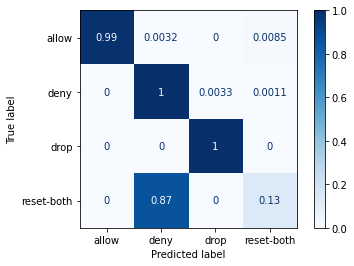

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_name='NB'
model = GaussianNB()
model.fit(x_train, y_train)

prediction = model.predict( x_test )
mseloss = MSEloss(y_test, prediction)

models_scores[model_name] = {"acc":model.score(x_test, y_test),
                        "balance_acc": metrics.balanced_accuracy_score( y_test, prediction), 
                        "precision":metrics.precision_score(  y_test, prediction , average='micro' ), 
                        "recall":metrics.recall_score(  y_test, prediction , average='micro' ), 
                        "f1":metrics.f1_score(  y_test, prediction , average='micro' ),
                        "MSE":mseloss,
                        "AIC":AIC(mseloss, y_test.shape[0], num_of_features ),
                        "BIC":BIC(mseloss, y_test.shape[0], num_of_features )
                        }

print(metrics.classification_report(y_test, prediction))

for item in models_scores[model_name]:
    print(item,":",models_scores[model_name][item])

print("\nconfusion matrix:\n", metrics.confusion_matrix( y_test, prediction ), "\n\n")
metrics.plot_confusion_matrix(model, x_test , y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

##SGDClassifire

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     11306
           1       0.98      0.88      0.93      4556
           2       0.81      1.00      0.89      3783
           3       0.00      0.00      0.00        15

    accuracy                           0.95     19660
   macro avg       0.70      0.71      0.70     19660
weighted avg       0.96      0.95      0.95     19660

acc : 0.9490844354018312
balance_acc : 0.7108015692290155
precision : 0.9490844354018312
recall : 0.9490844354018312
f1 : 0.9490844354018312
MSE : [2.53280773 0.77054934 0.77054934 ... 1.00829095 2.53280773 2.53280773]
AIC : [18292.59757599 -5102.41028973 -5102.41028973 ...   184.32799968
 18292.59757599 18292.59757599]
BIC : [18379.34733132 -5015.6605344  -5015.6605344  ...   271.07775502
 18379.34733132 18379.34733132]

confusion matrix:
 [[10851    68   387     0]
 [    5  4025   526     0]
 [    0     0  3783     0]
 [    2    12     1     0]] 




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


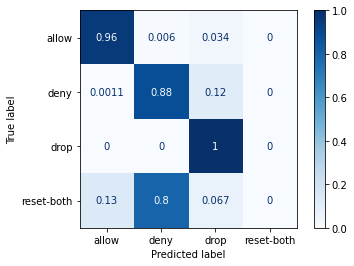

In [ ]:
from sklearn.linear_model import SGDClassifier
model_name = 'SGD'
model = SGDClassifier(loss="hinge", max_iter=100)
model.fit(x_train, y_train)

prediction = model.predict( x_test )
mseloss = MSEloss(y_test, prediction)

models_scores[model_name] = {"acc":model.score(x_test, y_test),
                        "balance_acc": metrics.balanced_accuracy_score( y_test, prediction), 
                        "precision":metrics.precision_score(  y_test, prediction , average='micro' ), 
                        "recall":metrics.recall_score(  y_test, prediction , average='micro' ), 
                        "f1":metrics.f1_score(  y_test, prediction , average='micro' ),
                        "MSE":mseloss,
                        "AIC":AIC(mseloss, y_test.shape[0], num_of_features ),
                        "BIC":BIC(mseloss, y_test.shape[0], num_of_features )
                        }

print(metrics.classification_report(y_test, prediction))

for item in models_scores[model_name]:
    print(item,":",models_scores[model_name][item])

print("\nconfusion matrix:\n", metrics.confusion_matrix( y_test, prediction ), "\n\n")
metrics.plot_confusion_matrix(model, x_test , y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

#CV with DT


K_fold:  1
acc : 0.9984742807323452
balance_acc : 0.9982164264646126
precision : 0.9984742807323452
recall : 0.9984742807323452
f1 : 0.9984742807323452
MSE : [0.76678291 0.76678291 1.0396687  ... 2.49389712 1.0396687  1.0396687 ]
AIC : [-1196.35052494 -1196.35052494   200.48286064 ...  4214.72818511
   200.48286064   200.48286064]
BIC : [-1125.60733068 -1125.60733068   271.22605491 ...  4285.47137937
   271.22605491   271.22605491]

K_fold:  2
acc : 0.997384481255449
balance_acc : 0.9474765827904972
precision : 0.997384481255449
recall : 0.997384481255449
f1 : 0.997384481255449
MSE : [0.78901482 1.04359198 1.04359198 ... 1.04359198 1.04359198 1.04359198]
AIC : [-1065.21915569   217.76348371   217.76348371 ...   217.76348371
   217.76348371   217.76348371]
BIC : [-994.47596143  288.50667797  288.50667797 ...  288.50667797  288.50667797
  288.50667797]

K_fold:  3
acc : 0.9973839110529757
balance_acc : 0.8482577918458675
precision : 0.9973839110529757
recall : 0.9973839110529757
f1 : 0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


acc : 0.9978199258774798
balance_acc : 0.9968851852968273
precision : 0.9978199258774798
recall : 0.9978199258774798
f1 : 0.9978199258774798
MSE : [2.5177676  0.76084587 0.76084587 ... 2.5177676  2.5177676  1.00392413]
AIC : [ 4257.51028829 -1231.73938701 -1231.73938701 ...  4257.51028829
  4257.51028829    39.96477492]
BIC : [ 4328.25108474 -1160.99859057 -1160.99859057 ...  4328.25108474
  4328.25108474   110.70557136]

K_fold:  7
acc : 0.9969478962284718
balance_acc : 0.8724574265472578
precision : 0.9969478962284718
recall : 0.9969478962284718
f1 : 0.9969478962284718
MSE : [0.78482668 0.78482668 1.0087203  ... 0.78482668 0.78482668 1.0087203 ]
AIC : [-1089.39510189 -1089.39510189    61.8266014  ... -1089.39510189
 -1089.39510189    61.8266014 ]
BIC : [-1018.65430545 -1018.65430545   132.56739784 ... -1018.65430545
 -1018.65430545   132.56739784]

K_fold:  8
acc : 0.9971659036407238
balance_acc : 0.9469214917005062
precision : 0.9971659036407238
recall : 0.9971659036407238
f1 : 0.99

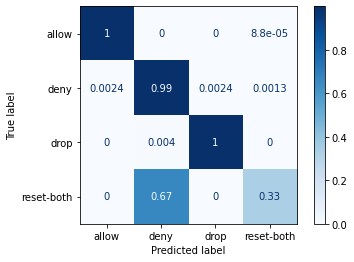

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

model_name='DT_Kfold'
model = DecisionTreeClassifier(random_state = 0)

k_fold = KFold(n_splits=10)
k_fold_scores = dict()
count=0
for train_indices, test_indices in k_fold.split(x_train):
    count +=1
    print("\nK_fold: ",count)
    # print('Train: %s | test: %s' % (train_indices, test_indices))
    model.fit(x_train[train_indices], y_train[train_indices])
    prediction = model.predict( x_train[test_indices] )
    mseloss = MSEloss(y_train[test_indices], prediction)

    k_fold_scores[count] = {"acc":model.score(x_train[test_indices], y_train[test_indices]),
                            "balance_acc": metrics.balanced_accuracy_score(y_train[test_indices], prediction), 
                            "precision":metrics.precision_score(  y_train[test_indices], prediction , average='micro' ), 
                            "recall":metrics.recall_score(  y_train[test_indices], prediction , average='micro' ), 
                            "f1":metrics.f1_score(  y_train[test_indices], prediction , average='micro' ),
                            "MSE":mseloss,
                            "AIC":AIC(mseloss, y_train[test_indices].shape[0], num_of_features ),
                            "BIC":BIC(mseloss, y_train[test_indices].shape[0], num_of_features )
                            }
    for item in k_fold_scores[count]:
        print(item,":",k_fold_scores[count][item])



prediction = model.predict( x_test )
mseloss = MSEloss(y_test, prediction)

models_scores[model_name] = {"acc":model.score(x_test, y_test),
                        "balance_acc": metrics.balanced_accuracy_score( y_test, prediction), 
                        "precision":metrics.precision_score(  y_test, prediction , average='micro' ), 
                        "recall":metrics.recall_score(  y_test, prediction , average='micro' ), 
                        "f1":metrics.f1_score(  y_test, prediction , average='micro' ),
                        "MSE":mseloss,
                        "AIC":AIC(mseloss, y_test.shape[0], num_of_features ),
                        "BIC":BIC(mseloss, y_test.shape[0], num_of_features )
                        }

print(metrics.classification_report(y_test, prediction))

for item in models_scores[model_name]:
    print(item,":",models_scores[model_name][item])

print("\nconfusion matrix:\n", metrics.confusion_matrix( y_test, prediction ), "\n\n")
metrics.plot_confusion_matrix(model, x_test , y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [ ]:
# sb.pairplot(scaled_features)

#Compare

In [ ]:
for item in models_scores:
    print(item ,": ", models_scores[item])

KNN :  {'acc': 0.994354018311292, 'balance_acc': 0.7465340510846253, 'precision': 0.994354018311292, 'recall': 0.994354018311292, 'f1': 0.994354018311292, 'MSE': array([2.53280773, 0.77054934, 0.77054934, ..., 1.00829095, 0.77054934,
       2.53280773]), 'AIC': array([18292.59757599, -5102.41028973, -5102.41028973, ...,
         184.32799968, -5102.41028973, 18292.59757599]), 'BIC': array([18379.34733132, -5015.6605344 , -5015.6605344 , ...,
         271.07775502, -5015.6605344 , 18379.34733132])}
DT :  {'acc': 0.9973041709053917, 'balance_acc': 0.7976699790860953, 'precision': 0.9973041709053917, 'recall': 0.9973041709053917, 'f1': 0.9973041709053917, 'MSE': array([2.53280773, 0.77054934, 0.77054934, ..., 1.00829095, 1.00829095,
       2.53280773]), 'AIC': array([18292.59757599, -5102.41028973, -5102.41028973, ...,
         184.32799968,   184.32799968, 18292.59757599]), 'BIC': array([18379.34733132, -5015.6605344 , -5015.6605344 , ...,
         271.07775502,   271.07775502, 18379.347